In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
# Os dados são lidos dos arquivos "t_data.txt" (tempo) e "h_data.txt" (altura)
t_data = np.loadtxt("t_data.txt"); h_data = np.loadtxt("h_data.txt"); # Leitura
n = t_data.size; t_data = t_data.reshape(n,1); h_data = h_data.reshape(n,1); # Reshape
print(np.hstack([t_data, h_data])) # Dados

[[0.      1.67203]
 [0.1     1.79792]
 [0.2     2.37791]
 [0.3     2.66408]
 [0.4     2.11245]
 [0.5     2.43969]
 [0.6     1.88843]
 [0.7     1.59447]
 [0.8     1.79634]
 [0.9     1.0781 ]
 [1.      0.21066]]


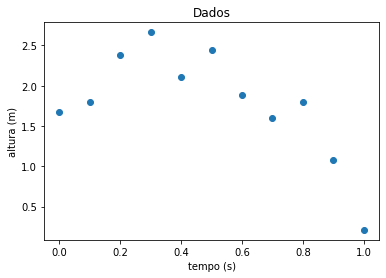

In [3]:
plt.scatter(t_data, h_data)
plt.title("Dados")
plt.xlabel("tempo (s)"); plt.ylabel("altura (m)");

In [4]:
A = np.hstack([np.ones((n,1)), t_data, t_data**2]) # Matriz do sistema sobredeterminado
print(A)

[[1.   0.   0.  ]
 [1.   0.1  0.01]
 [1.   0.2  0.04]
 [1.   0.3  0.09]
 [1.   0.4  0.16]
 [1.   0.5  0.25]
 [1.   0.6  0.36]
 [1.   0.7  0.49]
 [1.   0.8  0.64]
 [1.   0.9  0.81]
 [1.   1.   1.  ]]


In [5]:
G = np.dot(A.transpose(), A) # Matriz do sistema normal
print(G)

[[11.      5.5     3.85  ]
 [ 5.5     3.85    3.025 ]
 [ 3.85    3.025   2.5333]]


In [6]:
d = np.dot(A.transpose(), h_data) # Lado direito do sistema normal
print(d)

[[19.63208 ]
 [ 8.386632]
 [ 4.995481]]


In [7]:
a = np.linalg.solve(G, d) # Solução do sistema normal
a = np.reshape(a, (3,)) # Formato mais fácil para se trabalhar
print(a)

[ 1.65415252  3.90262443 -5.20208625]


In [8]:
g = -2*a[2]; print(g) # Aproximação para a aceleração da gravidade

10.404172494172505


In [9]:
def h(t): return a[0] + a[1]*t + a[2]*t**2 # Altura em função do tempo usando os coeficientes calculados

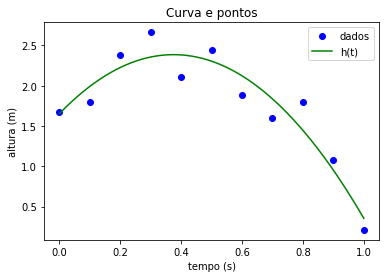

In [10]:
# Gráfico dos dados e da curva obtida
t = np.linspace(0.0, 1.0, 1000)
plt.plot(t_data, h_data, 'bo', label = "dados")
plt.plot(t, h(t), 'g-', label = "h(t)")
plt.title("Curva e pontos")
plt.xlabel("tempo (s)")
plt.ylabel("altura (m)")
plt.legend() # Show labels